## اضافه کردن کتابخانه‌های مورد نیاز

In [49]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

### استفاده از مدل قبلی
مدل جنگل تصادفی که در قسمت قبل (جنگل بازماندگان) آموزش داده‌اید را به وسیله‌ی ماژول `joblib` لود کنید. سپس ببینید که در این مدل اهمیت هر ویژگی چقدر بوده‌است.
- صفت `feature_importances_` مدل فقط اعداد مربوط به میزان اهمیت ستون‌های `X` داده‌ای که روی آن برازش شده را در خود دارد و لازم است به وسیله‌ی ساختن یک `Pandas Series` یا حتی یک دیکشنری پایتون آنها را به اسامی ستون‌ها منتسب کنید.
- داده‌ی `titanic` در فایل `titanic.csv` در کنار همین نوت‌بوک قرار دارد. 

In [36]:
rfc = joblib.load('model.pkl')
Titanic = pd.read_csv('titanic.csv')
X = Titanic.drop(['Survived','PassengerId'], axis = 1)

In [37]:
importances_rf = pd.Series(rfc.feature_importances_, index = X.columns)

In [38]:
sorted_importances_rf = importances_rf.sort_values(ascending = False)

Text(0.5, 1.0, 'Feature Importance')

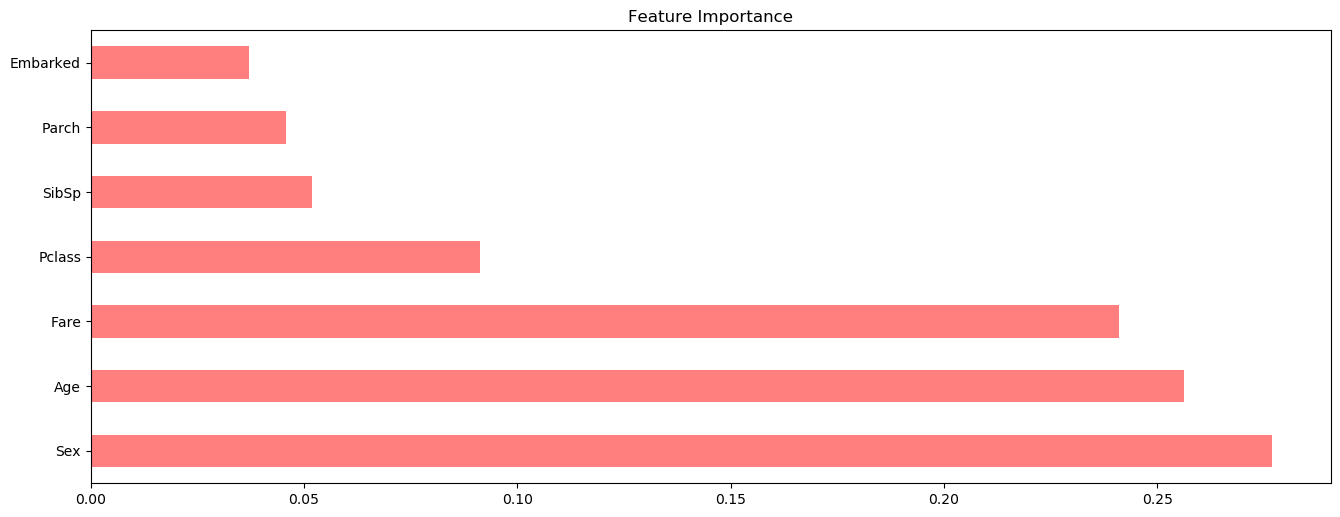

In [39]:
plt.figure(figsize = (16,6),dpi = 100)
sorted_importances_rf.plot(kind = 'barh',
                        color = 'red',alpha = 0.5)
plt.title("Feature Importance")

In [40]:
important_features = list(sorted_importances_rf[0:4].index)
important_features

['Sex', 'Age', 'Fare', 'Pclass']

می‌توانید برای درک بهتر نتایج اهمیت ویژگی‌های مختلف را در به صورت یک `barplot` رسم کنید.

همچنین می‌توانید بر اساس این نمودار نکاتی راجع به سیاست نجات داده شدن افراد در این سانحه بفهمید.

۴ متغیر پراهمیت را به ترتیب (زیاد به کم) به صورت لیست در متغیر `important_features` ذخیره کنید.

## مدل رگرسیون لجستیکی
حال می‌خواهیم با استفاده از این ۴ متغیر پراهمیت، یک مدل رگرسیون لجستیکی بسازیم. برای اینکه نتایج برای همه یکسان و قابل داوری باشند و همچنین اینکه بتوانیم دقت این مدل را با مدل‌های قبلی روی این   داده مقایسه کنیم، لازم است تا داده‌های آموزشی و آزمون یکسان باشند. پس هنگام تقسیم کردن داده‌ی تایتانیک به دو قسمت آموزش و آزمون `test_size=0.33,random_state=42` قرار دهید.

سپس یک مدل رگرسیون لجستیکی بسازید و آن را روی داده‌های آموزشی برازش کنید. سپس روی داده‌های آزمون `accuracy_score` آن را بدست آورید.

In [42]:
X_2 = Titanic[['Sex','Age','Fare','Pclass']]
y = Titanic['Survived']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_2,y,test_size=0.3,random_state=42)

In [46]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred_logistic = logistic_model.predict(X_test)

In [50]:
acc_logistic = accuracy_score(y_test,y_pred_logistic)
f1_logistic = metrics.f1_score(y_test,y_pred_logistic)
print("accuracy of linear logistic model :", acc_logistic)
print("f1_score of linear logistic model :", f1_logistic)

accuracy of linear logistic model : 0.797752808988764
f1_score of linear logistic model : 0.7299999999999999


می‌بینید که ما با استفاده از میزان اهمیت متغیر‌ها، توانستیم مدلی ساده‌تر و با دقت بالاتر داشته باشیم. حالا این مدل را در فایل `logistic_model.pkl` ذخیره کنید. و لیست حاوی ۴ متغیر مهم را در `important_features.pkl` ذخیره کنید.

In [51]:
joblib.dump(logistic_model,'logistic_model.pkl')
joblib.dump(important_features,'important_features.pkl')

['important_features.pkl']

## ارسال پاسخ
ابتدا نوت‌بوک را ذخیره و سپس گزینه‌ی ارسال پاسخ را انتخاب کنید تا مدل و لیست متغیر‌های مهم به همراه این نوت‌بوک ارسال شود.